In [1]:
# cnn model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import keras
import sklearn
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
try: from sklearn.model_selection import train_test_split
except: from sklearn.cross_validation import train_test_split
import pandas as pd
import numpy as np
from sklearn import datasets
import sys
sys.path.insert(0,'..')

from time import time
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [2]:
def evaluate(y_test,m):
    #evaluate results
    mse=sklearn.metrics.mean_squared_error(y_test,m)
    mabs=sklearn.metrics.mean_absolute_error(y_test,m)
    exvar=sklearn.metrics.explained_variance_score(y_test,m)   
    print('Mean Squa Error :',mse)
    print('Mean Abso Error :',mabs)
    print('Expl. Variance  :',exvar,'\n')

### Read the train & test and preprocessing

In [3]:
# https://github.com/joefavergel/TertiaryPhysicochemicalProperties/blob/master/RMSD-ProteinTertiaryStructures.ipynb
import pandas as pd
# load data
df=pd.read_csv('CASP.csv')
# del df['Date']
# del df['Next_Tmax'] #Next_Tmin
# drop nan 
df = df.dropna()
# the head of df
df.head()

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,17.284,13558.30,4305.35,0.31754,162.1730,1.872791e+06,215.3590,4287.87,102,27.0302
1,6.021,6191.96,1623.16,0.26213,53.3894,8.034467e+05,87.2024,3328.91,39,38.5468
2,9.275,7725.98,1726.28,0.22343,67.2887,1.075648e+06,81.7913,2981.04,29,38.8119
3,15.851,8424.58,2368.25,0.28111,67.8325,1.210472e+06,109.4390,3248.22,70,39.0651
4,7.962,7460.84,1736.94,0.23280,52.4123,1.021020e+06,94.5234,2814.42,41,39.9147


In [4]:
# df to values
df = df.values
Y = df[:,0]
X = df[:,1:9]

X = X.reshape(X.shape[0], X.shape[1], 1)
print(X.shape)

x_train,x_test,y_train,y_test=train_test_split(X, Y, test_size=0.2, random_state=1) 
x_train_, x_test_, y_train_, y_test_ = x_train, x_test, y_train, y_test

(45730, 8, 1)


In [5]:
def standardize(train, test):

    mean = np.mean(train, axis=0)
    std = np.std(train, axis=0)+0.000001

    X_train = (train - mean) / std
    X_test = (test - mean) /std
    return X_train, X_test

x_train, x_test = standardize(x_train, x_test)

In [6]:
x_test.shape

(9146, 8, 1)

In [7]:
# print(np.any(np.isnan(X_test)))
# print(np.any(np.isnan(y_test)))

### Creation structure of CNN

In [8]:
# build CNN
def CNN_net():
    
    model = Sequential()
    model.add(Conv1D(64, 3, activation="relu", input_shape=(X.shape[1],1)))
#     model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.5))
    
    model.add(Conv1D(128, 3, activation='relu'))
#     model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.5))    
    
    
    model.add(Flatten())
    #model.add(Dense(64, activation="relu"))
    model.add(Dense(1))
    model.compile(loss="mse", optimizer="adam")
    
    return model

In [9]:
# Parametres
verbose, epochs, batch_size = 1, 250, 5
# initialize the model object
clf_cnn = CNN_net()
# fit network #Train the model using tensorboard instance in the callbacks
history = clf_cnn.fit(x_train, y_train, batch_size=batch_size,
          epochs=epochs, verbose=verbose, validation_data=(x_test, y_test))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Train on 36584 samples, validate on 9146 samples
Epoch 1/250
36584/36584 [==============================] - 23s 632us/step - loss: 28.6941 - val_loss: 24.3508
Epoch 2/250
36584/36584 [==============================] - 19s 522us/step - loss: 26.1696 - val_loss: 24.4547
Epoch 3/250
36584/36584 [==============================] - 18s 484us/step - loss: 25.4764 - val_loss: 23.7916
Epoch 4/250
36584/36584 [==============================] - 19s 524us/step - loss: 25.4205 - val_loss: 23.7538
Epoch 5/250
36584/36584 [==============================] - 19s 506us/step - loss: 25.3151 - val_loss: 23.6457
Epoch 6/250
36584/36584 [==============================] - 17s 464us/step - loss: 24.9666 - val_loss: 24.2597
Epoch 7/250
36584/36584 [==============================] - 17s 463us/step - loss: 24.9263 - val_loss: 23.0864
Epoch 8/250
36584/36584 [==============================] - 17s 464us/step - loss: 24.7130 - val_los

36584/36584 [==============================] - 18s 501us/step - loss: 22.8631 - val_loss: 21.5891
Epoch 69/250
36584/36584 [==============================] - 18s 499us/step - loss: 22.8684 - val_loss: 21.6588
Epoch 70/250
36584/36584 [==============================] - 18s 503us/step - loss: 23.1402 - val_loss: 21.4521
Epoch 71/250
36584/36584 [==============================] - 19s 509us/step - loss: 22.8880 - val_loss: 21.3758
Epoch 72/250
36584/36584 [==============================] - 18s 495us/step - loss: 22.9988 - val_loss: 21.3415
Epoch 73/250
36584/36584 [==============================] - 18s 500us/step - loss: 22.9084 - val_loss: 21.2228
Epoch 74/250
36584/36584 [==============================] - 19s 513us/step - loss: 22.6932 - val_loss: 21.2989
Epoch 75/250
36584/36584 [==============================] - 18s 504us/step - loss: 22.7835 - val_loss: 21.3925
Epoch 76/250
36584/36584 [==============================] - 19s 509us/step - loss: 22.9223 - val_loss: 21.2397
Epoch 77/250
3

36584/36584 [==============================] - 19s 524us/step - loss: 22.6927 - val_loss: 20.9682
Epoch 142/250
36584/36584 [==============================] - 19s 518us/step - loss: 22.6708 - val_loss: 21.4305
Epoch 143/250
36584/36584 [==============================] - 19s 518us/step - loss: 23.1275 - val_loss: 21.2933
Epoch 144/250
36584/36584 [==============================] - 19s 514us/step - loss: 23.1067 - val_loss: 21.1268
Epoch 145/250
36584/36584 [==============================] - 19s 521us/step - loss: 22.6582 - val_loss: 21.4788
Epoch 146/250
36584/36584 [==============================] - 19s 513us/step - loss: 22.5484 - val_loss: 21.4078
Epoch 147/250
36584/36584 [==============================] - 19s 528us/step - loss: 22.3870 - val_loss: 21.6274
Epoch 148/250
36584/36584 [==============================] - 19s 513us/step - loss: 22.5128 - val_loss: 21.6597
Epoch 149/250
36584/36584 [==============================] - 19s 508us/step - loss: 22.5501 - val_loss: 20.9273
Epoch 

36584/36584 [==============================] - 19s 511us/step - loss: 22.4151 - val_loss: 20.5863
Epoch 215/250
36584/36584 [==============================] - 19s 510us/step - loss: 22.4172 - val_loss: 20.7727
Epoch 216/250
36584/36584 [==============================] - 18s 505us/step - loss: 22.3331 - val_loss: 21.2470
Epoch 217/250
36584/36584 [==============================] - 19s 510us/step - loss: 22.3809 - val_loss: 21.1436
Epoch 218/250
36584/36584 [==============================] - 21s 570us/step - loss: 22.3098 - val_loss: 21.0372
Epoch 219/250
36584/36584 [==============================] - 20s 542us/step - loss: 22.8546 - val_loss: 20.7052
Epoch 220/250
36584/36584 [==============================] - 19s 518us/step - loss: 22.3332 - val_loss: 21.3295
Epoch 221/250
36584/36584 [==============================] - 19s 519us/step - loss: 22.7752 - val_loss: 21.0749
Epoch 222/250
36584/36584 [==============================] - 19s 506us/step - loss: 22.4378 - val_loss: 20.6451
Epoch 

In [10]:
ypred = clf_cnn.predict(x_test)

print(" Model.evaluate : ",clf_cnn.evaluate(x_train, y_train),'\n')

#evaluate results
mse=sklearn.metrics.mean_squared_error(y_test,ypred)
mabs=sklearn.metrics.mean_absolute_error(y_test,ypred)
exvar=sklearn.metrics.explained_variance_score(y_test,ypred)   
print('Mean Squa Error :',mse)
print('Mean Abso Error :',mabs)
print('Expl. Variance  :',exvar)

36584/36584 [==============================] - 1s 36us/step
 Model.evaluate :  21.21301582431522 

Mean Squa Error : 21.460440900482602
Mean Abso Error : 3.840247759400273
Expl. Variance  : 0.4288683738995692


In [11]:
clf_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 6, 64)             256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 64)             0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 4, 128)            24704     
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 128)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513       
Total params: 25,473
Trainable params: 25,473
Non-trainable params: 0
__________________________________________________

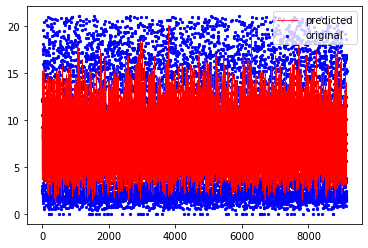

In [12]:
#https://www.datatechnotes.com/2019/12/how-to-fit-regression-data-with-cnn.html
x_ax = range(len(ypred))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

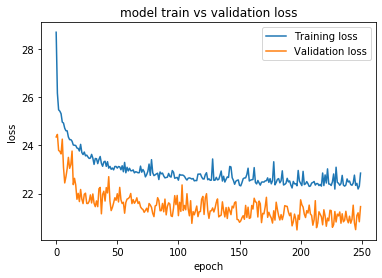

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training loss','Validation loss'], loc='best')
plt.show()

### Testing the Novel Approach

### Feature Extraction by CNN

In [14]:
from keras.models import Model
# from the first Fully-Connected layer 
layer_name = 'dense_1'
intermediate_layer_model = Model(inputs=clf_cnn.input,
                                 outputs=clf_cnn.get_layer(layer_name).output)

In [15]:
# Save the features of the train dataset to use it in future.
out_cnn_train = intermediate_layer_model.predict(x_train)
# Save the features of the test dataset to use it in future.
out_cnn_test = intermediate_layer_model.predict(x_test)

In [16]:
print('Training Features (from CNN) Shape:', out_cnn_train.shape)
print('Training Labels (from CNN) Shape:', y_train.shape,'\n')

print('Test Features (from CNN) Shape:', out_cnn_test.shape)
print('Test Labels (from CNN) Shape:', y_test.shape,'\n')

print('Test Features original Shape:', x_train_.shape)
print('Test Features original Shape:', x_test_.shape)

Training Features (from CNN) Shape: (36584, 1)
Training Labels (from CNN) Shape: (36584,) 

Test Features (from CNN) Shape: (9146, 1)
Test Labels (from CNN) Shape: (9146,) 

Test Features original Shape: (36584, 8, 1)
Test Features original Shape: (9146, 8, 1)


### Classification by CNN + Random Forest + MLP

In [17]:
from djinn import djinn
print("djinn example")    
modelname="reg_djinn_test"   # name the model
ntrees=1                 # number of trees = number of neural nets in ensemble
maxdepth=5               # max depth of tree -- optimize this for each data set
dropout_keep=1.0         # dropout typically set to 1 for non-Bayesian models

#initialize the model
model=djinn.DJINN_Regressor(ntrees,maxdepth,dropout_keep)
x_train, y_train, x_test, y_test = out_cnn_train, y_train, out_cnn_test, y_test

# find optimal settings: this function returns dict with hyper-parameters
# each djinn function accepts random seeds for reproducible behavior
optimal=model.get_hyperparameters(x_train, y_train, random_state=42)
batchsize=optimal['batch_size']
learnrate=optimal['learn_rate']
epochs=optimal['epochs']

# batchsize=304
# learnrate=0.002474296684203603
# epochs=210
 
# train the model with hyperparameters determined above
model.train(x_train,y_train,epochs=epochs,learn_rate=learnrate, batch_size=batchsize, 
              display_step=1, save_files=True, file_name=modelname, 
              save_model=True,model_name=modelname, random_state=1)

# *note there is a function model.fit(x_train,y_train, ... ) that wraps 
# get_hyperparameters() and train(), so that you do not have to manually
# pass hyperparameters to train(). However, get_hyperparameters() can
# be expensive, so I recommend running it once per dataset and using those
# hyperparameter values in train() to save computational time

# make predictions
m=model.predict(x_test) #returns the median prediction if more than one tree

#evaluate results
evaluate(y_test,m)

#close model 
model.close_model()

djinn example
Finding optimal hyper-parameters...
Determining learning rate...


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Determining number of epochs needed...



Optimal learning rate:  0.0010786792855644034
Optimal # epochs:  210
Optimal batch size:  1830



Epoch: 0001 cost= 0.170274795
Epoch: 0002 cost= 0.101927305
Epoch: 0003 cost= 0.080588542
Epoch: 0004 cost= 0.072976019
Epoch: 0005 cost= 0.066981434
Epoch: 0006 cost= 0.062695587
Epoch: 0007 cost= 0.057635124
Epoch: 0008 cost= 0.053218143
Epoch: 0009 cost= 0.049201271
Epoch: 0010 cost= 0.046453233


Epoch: 0207 cost= 0.043397237
Epoch: 0208 cost= 0.043338003
Epoch: 0209 cost= 0.043103364
Epoch: 0210 cost= 0.043636819
Optimization Finished!
Model saved in: ./reg_djinn_test_tree0.ckpt

INFO:tensorflow:Restoring parameters from ./reg_djinn_test_tree0.ckpt
Model 0 restored
Mean Squa Error : 19.56481583243091
Mean Abso Error : 3.3661675850636534
Expl. Variance  : 0.47783990561157175 



### Classification by CNN + ( SVM, XGB, DTree, ExtraTrees, RandomFores)


In [18]:
#https://stackoverflow.com/questions/41925157/logisticregression-unknown-label-type-continuous-using-sklearn-in-python
import numpy as np
from sklearn import linear_model
from sklearn import svm

classifiers = [
    svm.SVR(gamma='scale'),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()
              ]

for item in classifiers:
    print(item,'\n')
    clf = item
    clf.fit(out_cnn_train, y_train)
    #print(clf.predict(predictionData),'\n')
    #Feed the features of the test to ExtraTreesClassifier Classifier to predict its class
    m = clf.predict(out_cnn_test)
    #evaluate results
    mse=sklearn.metrics.mean_squared_error(y_test,m)
    mabs=sklearn.metrics.mean_absolute_error(y_test,m)
    exvar=sklearn.metrics.explained_variance_score(y_test,m)   
    print('Mean Squa Error :',mse)
    print('Mean Abso Error :',mabs)
    print('Expl. Variance  :',exvar,'\n')
    print("================================================================================")

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) 

Mean Squa Error : 20.945905062483536
Mean Abso Error : 3.2221279883010983
Expl. Variance  : 0.44715961299245244 

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False) 

Mean Squa Error : 19.81919505803684
Mean Abso Error : 3.458075806561677
Expl. Variance  : 0.47123938210188665 

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
              fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
              normalize=False, tol=0.001, verbose=False) 

Mean Squ

MemoryError: 

In [ ]:
#Feed the extracted features with the labels to RANDOM FOREST 
from xgboost import XGBRegressor
XGBModel = XGBRegressor()
XGBModel.fit(out_cnn_train, y_train , verbose=False)
# Get the mean absolute error on the validation data :
XGBpredictions = XGBModel.predict(out_cnn_test)
print('CNN XGBRegressor      ')
evaluate(y_test,XGBpredictions)

    
from sklearn.ensemble import ExtraTreesRegressor
Ext = ExtraTreesRegressor(n_estimators=10)
Ext.fit(out_cnn_train, y_train)
#Feed the features of the test to ExtraTreesClassifier Classifier to predict its class
predictionsCNN_Ext = Ext.predict(out_cnn_test)
print('CNN ExtraTreesRegressor      ')
evaluate(y_test,predictionsCNN_Ext)


from sklearn import tree
clf_dt = tree.DecisionTreeRegressor()
clf_dt.fit(out_cnn_train, y_train)
# Get the mean absolute error on the validation data :
clf_dtpredictions = clf_dt.predict(out_cnn_test)
print('CNN DecisionTreeRegressor      ')
evaluate(y_test,clf_dtpredictions)

In [ ]:
out_cnn_train.shape

###  MLP

In [ ]:
# Regression Example With Boston Dataset: Baseline
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.wrappers.scikit_learn import KerasClassifier


def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(128, input_dim=out_cnn_train.shape[1], kernel_initializer='normal', activation='relu'))
	model.add(Dense(64, activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model


clf_MLP = KerasClassifier(build_fn = baseline_model, epochs = 50, batch_size=5, verbose=1)
clf_MLP.fit(out_cnn_train, y_train)
y_predmlp = clf_MLP.predict(out_cnn_test)

#print("CNN MLP Model.evaluate : ",clf_MLP.evaluate(out_cnn_test, y_train),'\n')
#evaluate results
mse=sklearn.metrics.mean_squared_error(y_test,y_predmlp)
mabs=sklearn.metrics.mean_absolute_error(y_test,y_predmlp)
exvar=sklearn.metrics.explained_variance_score(y_test,y_predmlp)   
print('CNN MLP Mean Squa Error :',mse)
print('CNN MLP Mean Abso Error :',mabs)
print('CNN MLP Expl. Variance  :',exvar)

### Classification by RandomForest, ExtraTrees, XGBRegressor

In [ ]:
x_train_ = x_train_.reshape(x_train_.shape[0], x_train_.shape[1])
x_test_  = x_test_.reshape(x_test_.shape[0], x_test_.shape[1])

In [ ]:
# RandomForestClassifier : from dataset originl
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train_, y_train_)
predictions = rf.predict(x_test_)
print('CNN RandomForestRegressor      ')
evaluate(y_test_,predictions)


#Feed the extracted features with the labels to RANDOM FOREST 
from xgboost import XGBRegressor
XGBModel = XGBRegressor()
XGBModel.fit(x_train_, y_train_ , verbose=False)
# Get the mean absolute error on the validation data :
XGBpredictions = XGBModel.predict(x_test_)
print('CNN XGBRegressor      ')
evaluate(y_test_,XGBpredictions)

    
from sklearn.ensemble import ExtraTreesRegressor
Ext = ExtraTreesRegressor(n_estimators=10)
Ext.fit(x_train_, y_train_)
#Feed the features of the test to ExtraTreesClassifier Classifier to predict its class
predictionsCNN_Ext = Ext.predict(x_test_)
print('CNN ExtraTreesRegressor      ')
evaluate(y_test_,predictionsCNN_Ext)